# Create data for machine learning

## Read data files

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [2]:
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


In [3]:
vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
vitalsDf = vitalsDf[vitalsDf.concept_name == 'Temperature'].drop_duplicates()
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
378295,84004766,16293635,2599003,2022-04-08 14:15:32,Temperature,35.9
378296,24703131,12591406,2202499,2019-07-14 19:02:27,Temperature,36.5
378297,39259423,15198519,2015831,2021-09-03 14:13:43,Temperature,36.8
378298,84662503,16293635,2599003,2022-04-20 14:46:15,Temperature,36.8
378299,84382995,16293635,2599003,2022-04-15 06:34:31,Temperature,37.8
...,...,...,...,...,...,...
11092084,1131079,9272111,2099069,2018-10-26 10:43:48,Temperature,36.3
11092085,30653320,13978733,549608,2020-10-14 11:52:06,Temperature,36.2
11092086,691188,9272111,2099069,2018-10-26 19:25:16,Temperature,36.5
11092087,106359805,10136286,2149832,2018-06-22 09:37:34,Temperature,35.6


In [5]:
icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))
icdsDf

/tmp/ipykernel_346992/505271447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))


,EPISODE_ID,PATIENT_ID,AUSTRALIAN_MODIFICATION,PREFIX,ICD_DESCRIPTION,RANK,ICD10CODE
0,17135310,2161346,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
1,17107985,2147565,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
2,17106652,2182523,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
3,17103071,2200486,Z491,P,Extracorporeal dialysis,1,NaN
4,17103049,2200486,Z491,P,Extracorporeal dialysis,1,NaN
...,...,...,...,...,...,...,...
456643,9,2089883,M8199,P,"Unspecified osteoporosis, site unspecified",8,NaN
456644,9,2089883,I10,P,Essential (primary) hypertension,7,NaN
456645,9,2089883,E86,P,Volume depletion,6,NaN
456646,9,2089883,U739,P,Unspecified activity,5,NaN


In [6]:
sepsisDf = icdsDf[(icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A40')) | (icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A41'))][['EPISODE_ID', 'PATIENT_ID']].drop_duplicates()
sepsisDf['sepsis'] = 1
sepsisDf

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


In [10]:
sepsisDf.drop_duplicates()

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


## Create balanced data

In [ ]:
notsepsisDf = admissionsDf[~admissionsDf[['PATIENT_ID', 'EPISODE_ID']].set_index(['PATIENT_ID', 'EPISODE_ID']).index.isin(sepsisDf.set_index(['PATIENT_ID', 'EPISODE_ID']).index)][['PATIENT_ID', 'EPISODE_ID']]
notsepsisDf = notsepsisDf.sample(n=sepsisDf.drop_duplicates().shape[0])
notsepsisDf

,PATIENT_ID,EPISODE_ID
79095,2131925,9796636
63367,2228320,8996183
39080,310146,1848687
13734,2132539,447006
116935,2028017,12944746
...,...,...
53486,1548773,5612272
52217,1006681,4453835
71958,2108649,9422748
4983,2008159,321545


In [42]:
balancedDf = pd.concat([sepsisDf[['PATIENT_ID', 'EPISODE_ID']], notsepsisDf], ignore_index=True)
balancedDf

,PATIENT_ID,EPISODE_ID
0,2188789,17030802
1,1466886,17003144
2,2097130,16982177
3,2090730,16875811
4,2193278,16859246
...,...,...
7961,1548773,5612272
7962,1006681,4453835
7963,2108649,9422748
7964,2008159,321545


## Merge all the files

In [ ]:
dataDf = admissionsDf[['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED']].drop_duplicates().merge(
    balancedDf,
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID'],
).merge(
    vitalsDf,
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(columns=['person_id', 'visit_occurrence_id']).merge(
    sepsisDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).fillna(0)
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis
0,2152832,113016,2015-11-03 08:30:04.000,1190856,2014-12-30 14:44:58,Temperature,36.1,0.0
1,1548773,191152,2016-01-18 19:15:50.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
2,1548773,191152,2016-01-14 14:57:44.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
3,1548773,191152,2016-01-14 14:57:50.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
4,2151273,192772,2015-12-20 09:32:14.000,106074232,2016-01-21 09:53:31,Temperature,36.7,1.0
...,...,...,...,...,...,...,...,...
243791,2652541,17776102,2023-06-12 09:56:23.000,105929003,2023-06-02 12:06:23,Temperature,36.4,0.0
243792,2652541,17776102,2023-06-12 09:56:23.000,105945073,2023-06-02 19:33:34,Temperature,36.2,0.0
243793,2652541,17776102,2023-06-12 09:56:23.000,105947525,2023-06-02 22:10:08,Temperature,36.5,0.0
243794,2652541,17776102,2023-06-12 09:56:23.000,105954514,2023-06-03 02:35:41,Temperature,36.1,0.0


In [56]:
dataDf.groupby(by=['sepsis']).agg({'EPISODE_ID': [('Unique Count', 'nunique')]})/dataDf.EPISODE_ID.unique().shape[0]*100

,EPISODE_ID
,Unique Count
sepsis,
0.0,47.660587
1.0,52.339413


In [57]:
dataDf.sepsis.value_counts()/dataDf.shape[0]*100

sepsis
1.0    83.989483
0.0    16.010517
Name: count, dtype: float64

In [58]:
dataDf["measurement_datetime"] = pd.to_datetime(dataDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
dataDf["Organism_FIRST_NOTED"] = pd.to_datetime(dataDf["Organism_FIRST_NOTED"]).dt.strftime('%Y-%m-%d')
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis
0,2152832,113016,2015-11-03,1190856,2014-12-30,Temperature,36.1,0.0
1,1548773,191152,2016-01-18,2052027,2016-02-26,Temperature,36.5,1.0
2,1548773,191152,2016-01-14,2052027,2016-02-26,Temperature,36.5,1.0
3,1548773,191152,2016-01-14,2052027,2016-02-26,Temperature,36.5,1.0
4,2151273,192772,2015-12-20,106074232,2016-01-21,Temperature,36.7,1.0
...,...,...,...,...,...,...,...,...
243791,2652541,17776102,2023-06-12,105929003,2023-06-02,Temperature,36.4,0.0
243792,2652541,17776102,2023-06-12,105945073,2023-06-02,Temperature,36.2,0.0
243793,2652541,17776102,2023-06-12,105947525,2023-06-02,Temperature,36.5,0.0
243794,2652541,17776102,2023-06-12,105954514,2023-06-03,Temperature,36.1,0.0


In [59]:
dataDf = dataDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': [('Organism_FIRST_NOTED_updated', 'first')]}).droplevel(level=0, axis=1).reset_index(),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).rename(
    columns={'Organism_FIRST_NOTED_updated': 'Organism_FIRST_NOTED'}
)
dataDf


,PATIENT_ID,EPISODE_ID,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis,Organism_FIRST_NOTED
0,2152832,113016,1190856,2014-12-30,Temperature,36.1,0.0,2015-11-03
1,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
2,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
3,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
4,2151273,192772,106074232,2016-01-21,Temperature,36.7,1.0,2015-12-20
...,...,...,...,...,...,...,...,...
243791,2652541,17776102,105929003,2023-06-02,Temperature,36.4,0.0,2023-06-12
243792,2652541,17776102,105945073,2023-06-02,Temperature,36.2,0.0,2023-06-12
243793,2652541,17776102,105947525,2023-06-02,Temperature,36.5,0.0,2023-06-12
243794,2652541,17776102,105954514,2023-06-03,Temperature,36.1,0.0,2023-06-12


In [60]:
countDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'concept_name', 'sepsis']).agg({'PATIENT_ID': [('count_value', 'count')]}).droplevel(level=0, axis=1).reset_index()
countDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,concept_name,sepsis,count_value
0,62567,12641659,2019-07-26,2019-07-24,Temperature,0.0,3
1,62567,12648702,2019-07-26,2019-07-25,Temperature,1.0,7
2,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,8
3,62567,12648702,2019-07-26,2019-07-27,Temperature,1.0,6
4,62567,12648702,2019-07-26,2019-07-28,Temperature,1.0,6
...,...,...,...,...,...,...,...
18053,2645864,17592676,2023-05-18,2023-04-18,Temperature,0.0,4
18054,2645864,17644429,2023-05-18,2023-05-05,Temperature,0.0,8
18055,2652541,17776102,2023-06-12,2023-06-01,Temperature,0.0,10
18056,2652541,17776102,2023-06-12,2023-06-02,Temperature,0.0,8


In [61]:
countDf.count_value.apply(lambda x: x if (x < 10) else None).value_counts()/countDf.shape[0] * 100

count_value
6.0    11.933769
3.0     6.960904
5.0     6.612028
2.0     6.606490
4.0     6.468047
1.0     5.199911
8.0     4.806734
7.0     4.396943
9.0     2.325839
Name: count, dtype: float64

In [62]:
formattedDf = dataDf.groupby(
    by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'concept_name', 'sepsis']
    ).agg(
        {'value_as_number': [('value_mean', 'mean'), ('value_std', 'std'), ('value', 'ohlc')]}
    ).droplevel(level=0, axis=1).reset_index()
formattedDf.columns = [('_'.join(col).strip()).strip('_').replace('_value_as_number', '') for col in formattedDf.columns.values]
formattedDf.measurement_datetime = pd.to_datetime(formattedDf.measurement_datetime)
formattedDf.Organism_FIRST_NOTED = pd.to_datetime(formattedDf.Organism_FIRST_NOTED)
formattedDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,concept_name,sepsis,value_mean,value_std,value_open,value_high,value_low,value_close
0,62567,12641659,2019-07-26,2019-07-24,Temperature,0.0,36.466667,0.550757,37.1,37.1,36.1,36.2
1,62567,12648702,2019-07-26,2019-07-25,Temperature,1.0,37.771429,0.596418,38.6,38.6,36.9,37.7
2,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,37.000000,0.427618,37.2,37.8,36.3,36.8
3,62567,12648702,2019-07-26,2019-07-27,Temperature,1.0,36.666667,0.398330,36.7,37.0,36.0,36.4
4,62567,12648702,2019-07-26,2019-07-28,Temperature,1.0,37.016667,0.331160,36.8,37.4,36.7,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...
18053,2645864,17592676,2023-05-18,2023-04-18,Temperature,0.0,37.300000,0.000000,37.3,37.3,37.3,37.3
18054,2645864,17644429,2023-05-18,2023-05-05,Temperature,0.0,36.200000,0.320713,36.5,36.5,35.9,35.9
18055,2652541,17776102,2023-06-12,2023-06-01,Temperature,0.0,36.140000,0.245855,36.0,36.5,35.9,36.5
18056,2652541,17776102,2023-06-12,2023-06-02,Temperature,0.0,36.275000,0.148805,36.1,36.5,36.1,36.5


In [63]:
measurementRangesDf = formattedDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'measurement_datetime': [('measurement_datetime_min', 'min'), ('measurement_datetime_max', 'max')]}).droplevel(level=0, axis=1).reset_index()
measurementRangesDf['measurement_datetime_range'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min)
measurementRangesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range
0,62567,12641659,2019-07-24,2019-07-24,0 days
1,62567,12648702,2019-07-25,2019-08-15,21 days
2,110792,15611828,2021-11-03,2021-11-16,13 days
3,111862,15289329,2021-09-01,2021-09-01,0 days
4,113106,13397639,2020-03-12,2020-03-23,11 days
...,...,...,...,...,...
1256,2645864,17509282,2023-03-17,2023-03-17,0 days
1257,2645864,17549198,2023-04-11,2023-04-11,0 days
1258,2645864,17592676,2023-04-18,2023-04-18,0 days
1259,2645864,17644429,2023-05-05,2023-05-05,0 days


<Axes: >

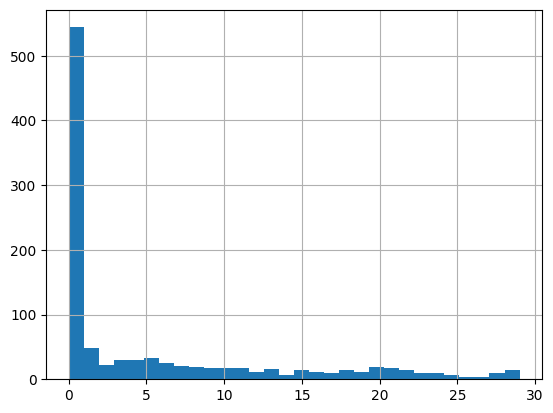

In [64]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 30 else None).hist(bins=30)

<Axes: >

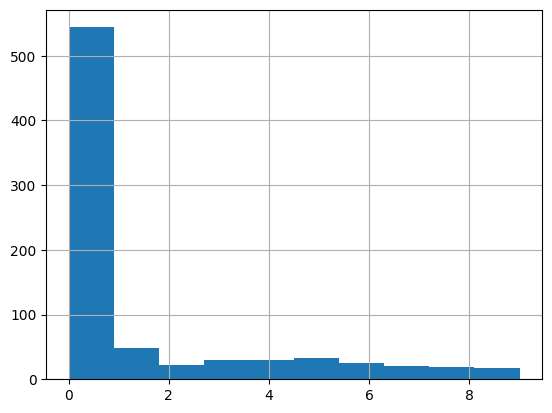

In [65]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=10)

In [66]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range
0.0    544
1.0     48
2.0     22
3.0     30
4.0     30
5.0     33
6.0     25
7.0     21
8.0     19
9.0     18
Name: count, dtype: int64

In [67]:
from datetime import timedelta


look_back = 3
measurementRangesDf['delta_days'] = measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: ((look_back - 1) - x)).apply(lambda x: x if x > 0 else 0)
measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)
measurementRangesDf['measurement_datetime_range_updated'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min_updated)
measurementRangesDf

/tmp/ipykernel_346992/38762998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)


,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range,delta_days,measurement_datetime_min_updated,measurement_datetime_range_updated
0,62567,12641659,2019-07-24,2019-07-24,0 days,2,2019-07-22,2 days
1,62567,12648702,2019-07-25,2019-08-15,21 days,0,2019-07-25,21 days
2,110792,15611828,2021-11-03,2021-11-16,13 days,0,2021-11-03,13 days
3,111862,15289329,2021-09-01,2021-09-01,0 days,2,2021-08-30,2 days
4,113106,13397639,2020-03-12,2020-03-23,11 days,0,2020-03-12,11 days
...,...,...,...,...,...,...,...,...
1256,2645864,17509282,2023-03-17,2023-03-17,0 days,2,2023-03-15,2 days
1257,2645864,17549198,2023-04-11,2023-04-11,0 days,2,2023-04-09,2 days
1258,2645864,17592676,2023-04-18,2023-04-18,0 days,2,2023-04-16,2 days
1259,2645864,17644429,2023-05-05,2023-05-05,0 days,2,2023-05-03,2 days


<Axes: >

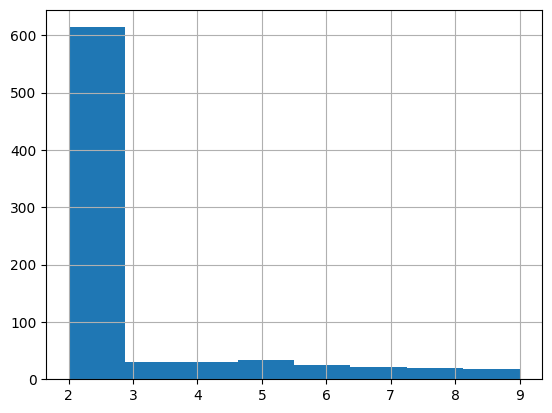

In [68]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=8)

In [69]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range_updated
2.0    614
3.0     30
4.0     30
5.0     33
6.0     25
7.0     21
8.0     19
9.0     18
Name: count, dtype: int64

In [70]:
from datetime import timedelta


data = []
for i, row in measurementRangesDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime_min_updated', 'measurement_datetime_max']].drop_duplicates().iterrows():
    currentDate = row.measurement_datetime_min_updated
    while (currentDate <= row.measurement_datetime_max):
        data.append([row.PATIENT_ID, row.EPISODE_ID, currentDate])
        currentDate = currentDate + timedelta(days=1)

measurementDatesDf = pd.DataFrame(data, columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'])
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,62567,12641659,2019-07-22
1,62567,12641659,2019-07-23
2,62567,12641659,2019-07-24
3,62567,12648702,2019-07-25
4,62567,12648702,2019-07-26
...,...,...,...
25644,2645864,17644429,2023-05-04
25645,2645864,17644429,2023-05-05
25646,2652541,17776102,2023-06-01
25647,2652541,17776102,2023-06-02


In [71]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()

/tmp/ipykernel_346992/2660346801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()


np.int64(25649)

In [72]:
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,62567,12641659,2019-07-22
1,62567,12641659,2019-07-23
2,62567,12641659,2019-07-24
3,62567,12648702,2019-07-25
4,62567,12648702,2019-07-26
...,...,...,...
25644,2645864,17644429,2023-05-04
25645,2645864,17644429,2023-05-05
25646,2652541,17776102,2023-06-01
25647,2652541,17776102,2023-06-02


In [73]:
finalDf = measurementDatesDf.merge(
    formattedDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Organism_FIRST_NOTED,concept_name,sepsis,value_mean,value_std,value_open,value_high,value_low,value_close
0,62567,12641659,2019-07-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62567,12641659,2019-07-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62567,12641659,2019-07-24,2019-07-26,Temperature,0.0,36.466667,0.550757,37.1,37.1,36.1,36.2
3,62567,12648702,2019-07-25,2019-07-26,Temperature,1.0,37.771429,0.596418,38.6,38.6,36.9,37.7
4,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,37.000000,0.427618,37.2,37.8,36.3,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...
25644,2645864,17644429,2023-05-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25645,2645864,17644429,2023-05-05,2023-05-18,Temperature,0.0,36.200000,0.320713,36.5,36.5,35.9,35.9
25646,2652541,17776102,2023-06-01,2023-06-12,Temperature,0.0,36.140000,0.245855,36.0,36.5,35.9,36.5
25647,2652541,17776102,2023-06-02,2023-06-12,Temperature,0.0,36.275000,0.148805,36.1,36.5,36.1,36.5


In [74]:
finalDf = finalDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'concept_name', 'sepsis', 'value_mean']]
finalDf['concept_name'] = 'Temperature'
finalDf = finalDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': 'first'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
).drop(columns=['sepsis']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'sepsis': 'max'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
)
finalDf.value_mean = finalDf.value_mean.fillna(finalDf.value_mean.mean())
finalDf

/tmp/ipykernel_346992/1254146903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['concept_name'] = 'Temperature'


,PATIENT_ID,EPISODE_ID,measurement_datetime,concept_name,value_mean,Organism_FIRST_NOTED,sepsis
0,62567,12641659,2019-07-22,Temperature,36.619097,2019-07-26,0.0
1,62567,12641659,2019-07-23,Temperature,36.619097,2019-07-26,0.0
2,62567,12641659,2019-07-24,Temperature,36.466667,2019-07-26,0.0
3,62567,12648702,2019-07-25,Temperature,37.771429,2019-07-26,1.0
4,62567,12648702,2019-07-26,Temperature,37.000000,2019-07-26,1.0
...,...,...,...,...,...,...,...
25644,2645864,17644429,2023-05-04,Temperature,36.619097,2023-05-18,0.0
25645,2645864,17644429,2023-05-05,Temperature,36.200000,2023-05-18,0.0
25646,2652541,17776102,2023-06-01,Temperature,36.140000,2023-06-12,0.0
25647,2652541,17776102,2023-06-02,Temperature,36.275000,2023-06-12,0.0


In [75]:
finalDf.sepsis.value_counts()/finalDf.shape[0]

sepsis
1.0    0.772662
0.0    0.227338
Name: count, dtype: float64

In [79]:
finalDf.groupby(by=['sepsis']).agg({'EPISODE_ID': [('Unique Count', 'nunique')]})/dataDf.EPISODE_ID.unique().shape[0]*100

,EPISODE_ID
,Unique Count
sepsis,
0.0,47.660587
1.0,52.339413


In [80]:
finalDf = finalDf.merge(
    pd.DataFrame(
        list(finalDf[finalDf.sepsis == 1].apply(lambda x: (x.loc['PATIENT_ID'], x.loc['EPISODE_ID'], x.loc['measurement_datetime'], (1 if (x.loc['measurement_datetime'] >= x.loc['Organism_FIRST_NOTED']) else 0)), axis=1)),
        columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'target']
        ),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
).fillna(0)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,concept_name,value_mean,Organism_FIRST_NOTED,sepsis,target
0,62567,12641659,2019-07-22,Temperature,36.619097,2019-07-26,0.0,0.0
1,62567,12641659,2019-07-23,Temperature,36.619097,2019-07-26,0.0,0.0
2,62567,12641659,2019-07-24,Temperature,36.466667,2019-07-26,0.0,0.0
3,62567,12648702,2019-07-25,Temperature,37.771429,2019-07-26,1.0,0.0
4,62567,12648702,2019-07-26,Temperature,37.000000,2019-07-26,1.0,1.0
...,...,...,...,...,...,...,...,...
25644,2645864,17644429,2023-05-04,Temperature,36.619097,2023-05-18,0.0,0.0
25645,2645864,17644429,2023-05-05,Temperature,36.200000,2023-05-18,0.0,0.0
25646,2652541,17776102,2023-06-01,Temperature,36.140000,2023-06-12,0.0,0.0
25647,2652541,17776102,2023-06-02,Temperature,36.275000,2023-06-12,0.0,0.0


In [81]:
finalDf.target.value_counts()/finalDf.shape[0]

target
0.0    0.58322
1.0    0.41678
Name: count, dtype: float64

In [92]:
finalDf.groupby(by=['target']).agg({'EPISODE_ID': [('Unique Count', 'nunique')]})/finalDf.EPISODE_ID.unique().shape[0]

,EPISODE_ID
,Unique Count
target,
0.0,0.869944
1.0,0.376685


In [93]:
import os
from pathlib import Path


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

finalDf.to_csv(Path(dataDirName, 'data_1_variable.csv'), index=False)